# Student Performance Prediction

In [1]:
# 1. Data Importing
# 2. Data Interploation
# 3. Data Visaulization
# 4. Feature Engineering
# 5. Model Training
# 6. Predictions
# 7. Model Evaluation
# 8. Model Tuning


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor

#for import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import time

import warnings
warnings.simplefilter('ignore') 


# 1. Data Importing

In [4]:
# Load the dataset
dataframee = pd.read_csv("prev_data.csv", header=0)
dataframee = dataframee.set_index('Exam Roll No.')

dataframee.head()


,Engineering Mathematics I,Chemistry,Communication Techniques,Programming in C,Basic Electrical Engineering,Mechanical Workshop,Engineering\r\nMathematics II,Physics,Engineering\r\nDrawing,Object Oriented\r\nProgramming in C++,...,Computer Network,Image Processing and\r\nPattern Recognition,ICT Project \r\nManagement,Elective II,Digital Signal \r\nAnalysis\r\nProcessing,Social and\r\nProfessional \r\nIssues in IT,Organization and\r\nManagement,Information\r\nSystem,Project III,Elective III
Exam Roll No.,,,,,,,,,,,,,,,,,,,,,
15070003,0.0,4.0,4.0,3.0,4.0,4.0,2.7,0.0,2.7,3.7,...,2.7,0.0,2.7,2.0,0.0,2.7,3.0,2.7,3.7,3.3
15070005,3.0,3.0,1.7,2.7,3.7,4.0,3.0,0.0,0.0,0.0,...,3.3,3.0,2.7,4.0,0.0,2.7,3.7,0.0,3.7,3.7
15070025,4.0,2.7,2.0,3.3,3.0,4.0,4.0,2.0,0.0,3.0,...,3.3,3.0,3.0,3.7,3.0,3.3,3.0,0.0,4.0,4.0
15070027,4.0,2.7,3.7,3.0,4.0,4.0,3.7,4.0,2.7,4.0,...,4.0,4.0,3.7,4.0,4.0,2.7,3.7,3.3,4.0,4.0
15070034,2.7,3.0,3.0,2.7,3.7,4.0,1.7,0.0,0.0,0.0,...,3.3,2.7,3.3,2.0,2.7,3.3,3.7,3.0,3.7,3.3


In [5]:
dataframee.shape

(154, 48)

# 2. Data Interploation

In [6]:
# Load your existing dataset into a pandas DataFrame
df = pd.read_csv('prev_data.csv')

# Define the number of synthetic samples you want to generate
num_samples = 1000

# Calculate the step size for linear interpolation
step_size = 1 / (num_samples + 1)

# Create a DataFrame to store the interpolated samples
interpolated_df = pd.DataFrame()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Perform linear interpolation for each column
    column_values = df[column].values
    
    # Generate the interpolated samples
    synthetic_values = np.interp(np.arange(1, num_samples + 1) * step_size, np.arange(len(column_values)), column_values)
    
    # Add the interpolated samples to the DataFrame
    interpolated_df[column] = synthetic_values

# Concatenate the original DataFrame and interpolated DataFrame
final_df = pd.concat([df, interpolated_df], ignore_index=True)

# Remove duplicated rows
final_df = final_df.drop_duplicates()

# Save the augmented dataset to a new CSV file
final_df.to_csv('augmented_data.csv', index=False)


In [7]:
final_df.shape


(1154, 49)

In [8]:
df.duplicated().sum()

0

In [9]:
# importing the final combined dataset
dataframe = pd.read_csv("model_data.csv", header=0)
dataframe = dataframe.set_index('Exam Roll No.')

dataframe.head()



,Engineering Mathematics I,Chemistry,Communication Techniques,Programming in C,Basic Electrical Engineering,Mechanical Workshop,Engineering\r\nMathematics II,Physics,Engineering\r\nDrawing,Object Oriented\r\nProgramming in C++,...,Computer Network,Image Processing and\r\nPattern Recognition,ICT Project \r\nManagement,Elective II,Digital Signal \r\nAnalysis\r\nProcessing,Social and\r\nProfessional \r\nIssues in IT,Organization and\r\nManagement,Information\r\nSystem,Project III,Elective III
Exam Roll No.,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,4.0,3.0,4.0,4.0,2.7,0.0,2.7,3.7,...,2.7,0.0,2.7,2.0,0.0,2.7,3.0,2.7,3.7,3.3
2,3.0,3.0,1.7,2.7,3.7,4.0,3.0,0.0,0.0,0.0,...,3.3,3.0,2.7,4.0,0.0,2.7,3.7,0.0,3.7,3.7
3,4.0,2.7,2.0,3.3,3.0,4.0,4.0,2.0,0.0,3.0,...,3.3,3.0,3.0,3.7,3.0,3.3,3.0,0.0,4.0,4.0
4,4.0,2.7,3.7,3.0,4.0,4.0,3.7,4.0,2.7,4.0,...,4.0,4.0,3.7,4.0,4.0,2.7,3.7,3.3,4.0,4.0
5,2.7,3.0,3.0,2.7,3.7,4.0,1.7,0.0,0.0,0.0,...,3.3,2.7,3.3,2.0,2.7,3.3,3.7,3.0,3.7,3.3


In [10]:
dataframe.shape


(1154, 48)

# 3. Data Visualization

In [11]:
#finding correlation among columns
#corr = dataframe.corr()
#corr

#sns.clustermap(corr, cmap="YlGnBu")


# 4. Feature Engineering

In [12]:
# Extracting the input and ouput features 

X= dataframe.iloc[:, 0:36].values  # Input features (previous subject scores)
y= dataframe.iloc[:, 36:48].values  # Target variables (upcoming subject scores)


print(X.shape)
print(y.shape)


(1154, 36)
(1154, 12)


# 5. Model Training

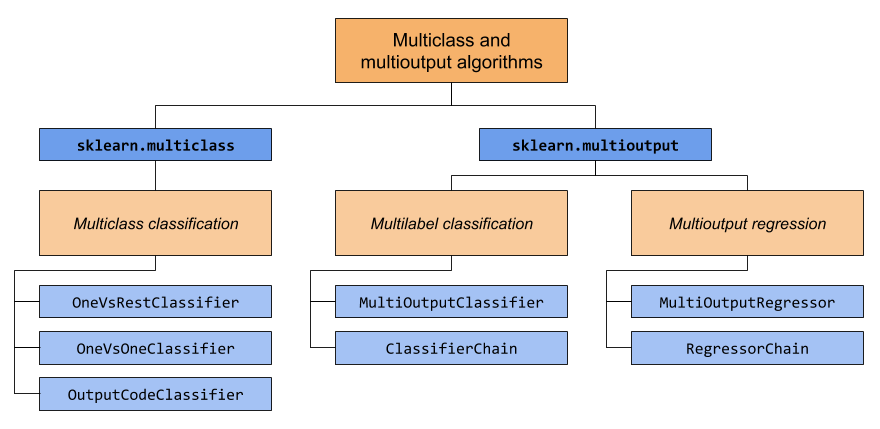


In [13]:
# testing out with RegressorChain

from sklearn.multioutput import RegressorChain
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100)

wrapper = RegressorChain(model)

# training all the models on the training dataset
wrapper.fit(X_train, y_train)
pred11 = wrapper.predict(X_test)


# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force the scores to be positive
n_scores = absolute(n_scores)


# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))




MAE: 0.091 (0.016)


In [14]:
# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Start measuring the runtime
start_time = time.time()

# Define the base models
model1 = RandomForestRegressor(n_estimators=100)
model2 = xgb.XGBRegressor(n_estimators=100)
model3 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
model4 = ElasticNet(alpha=1.0, l1_ratio=0.5)
model5 = ExtraTreesRegressor(n_estimators=100)
model6 = GradientBoostingRegressor(n_estimators=50)

# Wrap the base models with MultiOutputRegressor
model11 = MultiOutputRegressor(model1)
model22 = MultiOutputRegressor(model2)
model33 = MultiOutputRegressor(model3)
model44 = MultiOutputRegressor(model4)
model55 = MultiOutputRegressor(model5)
model66 = MultiOutputRegressor(model6)



# training all the models on the training dataset
model11.fit(X_train, y_train)
pred11 = model11.predict(X_test)
mae11 = mean_absolute_error(y_test, pred11)
r11 = r2_score(y_test, pred11)
print("MAE of RandomForest model: " ,mae11)

model22.fit(X_train, y_train)
pred22 = model22.predict(X_test)
mae22 = mean_absolute_error(y_test, pred22)
r22 = r2_score(y_test, pred11)
print("MAE of XGB model: " ,mae22)


model33.fit(X_train, y_train)
pred33 = model33.predict(X_test)
mae33 = mean_absolute_error(y_test, pred33)
r33 = r2_score(y_test, pred11)
print("MAE of SVR model: " ,mae33)



model44.fit(X_train, y_train)
pred44 = model44.predict(X_test)
mae44 = mean_absolute_error(y_test, pred44)
r44 = r2_score(y_test, pred11)
print("MAE of ElasticNet model: " ,mae44)


model55.fit(X_train, y_train)
pred55 = model55.predict(X_test)
mae55 = mean_absolute_error(y_test, pred55)
r55 = r2_score(y_test, pred11)
print("MAE of ExtraTreesRegressor model: " ,mae55)


model66.fit(X_train, y_train)
pred66 = model66.predict(X_test)
mae66 = mean_absolute_error(y_test, pred66)
r66 = r2_score(y_test, pred11)
print("MAE of GradientBoostingRegressor model: " ,mae66)
print('--------------------------------------------------------------')


# Stop measuring the runtime
end_time = time.time()

runtime = end_time - start_time
print("Runtime:", runtime, "seconds")



MAE of RandomForest model:  0.09202755038306526
MAE of XGB model:  0.10468637721001763
MAE of SVR model:  0.1350082297359659
MAE of ElasticNet model:  0.33521589260941265
MAE of ExtraTreesRegressor model:  0.09292809103832783
MAE of GradientBoostingRegressor model:  0.101879983041529
--------------------------------------------------------------
Runtime: 255.46737599372864 seconds


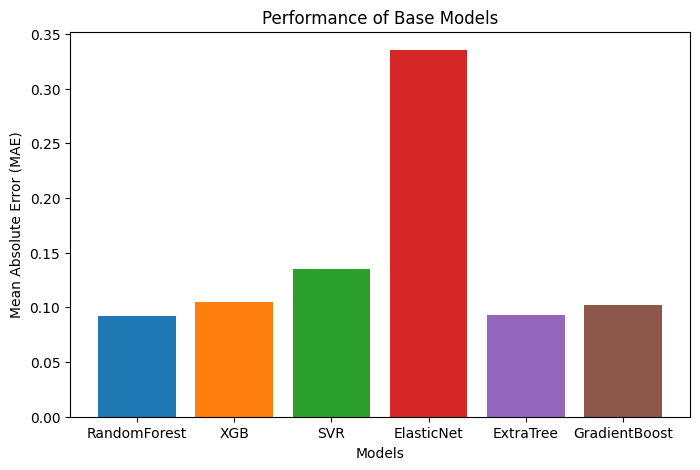

In [15]:
# plotting error metrices of all models

# Define the models and their corresponding MAE scores
models = ['RandomForest', 'XGB', 'SVR', 'ElasticNet', 'ExtraTree', 'GradientBoost']
mae_scores = [mae11, mae22, mae33, mae44, mae55, mae66]

# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot the MAE scores
plt.figure(figsize=(8, 5))
plt.bar(models, mae_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance of Base Models')
plt.show()


# Choosing Best Models

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start measuring the runtime
start_time = time.time()

# Define the base models
model1 = RandomForestRegressor(n_estimators=100)
model1.fit(X_train, y_train)
model2 = ExtraTreesRegressor(n_estimators=100)

# Wrap the base models with MultiOutputRegressor
model11 = MultiOutputRegressor(model1)
model22 = MultiOutputRegressor(model2)

# Combine the base models
estimators = [('model1', model11), ('model2', model22)]

stacked_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100))


# Training and evaluating the stacked model using cross-validation
scores = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_cv = -scores.mean()
stacked_model.fit(X_train, y_train)

# cross_val_score() function returns an array of scores for each fold
#negative_mae is multiplied by -1 to obtain positive value and mean average score is -scores.mean().

# Make predictions on the test set
y_pred = stacked_model.predict(X_test)


# Stop measuring the runtime
end_time = time.time()

# Calculate the errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the errors for meta-model
print("Meta-Model Evaluation")
print('--------------------------------------------------------')
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Cross-validated MAE:", mae_cv)
print('--------------------------------------------------------')


# Stop measuring the runtime
end_time = time.time()

# Calculate and print the runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")



Meta-Model Evaluation
--------------------------------------------------------
Mean Absolute Error (MAE): 0.09256464748066429
Root Mean Squared Error (RMSE): 0.34239271041139296
Cross-validated MAE: 0.08891993076692503
--------------------------------------------------------
Runtime: 794.4937438964844 seconds


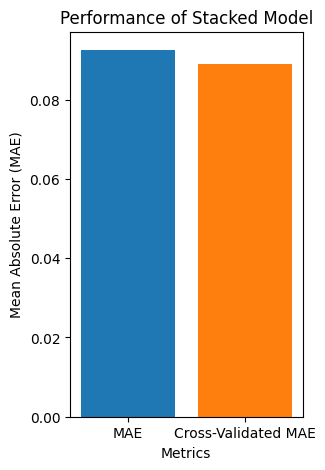

In [17]:
# Plot the MAE and Cross-Validated MAE for the stacked model
labels = ['MAE', 'Cross-Validated MAE']
scores = [mae, mae_cv]

plt.figure(figsize=(3, 5))
plt.bar(labels, scores, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Metrics')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance of Stacked Model')
plt.show()


# 6. Predictions

In [18]:
#Input the previous subject scores of the new student
X_new = np.array([[3.3,2,2.7,2.7,2.7,3.7,3.3,0,2.7,2.7,0,2,2.7,3.7,0,3,3,
                   2.7,0,2.7,1.3,2,0,4,2.7,0,2.7,0,0,3.7,
                   3.7,3.3,0,2,0,0]])

predicted_scores = stacked_model.predict(X_new)
print(predicted_scores)
print('----------------------------------------------------------------------------')


#Converting predicted_scores into grading system
grading_system = {
    (0.0,0.0): 'F',
    (0.0, 1.0): 'D',
    (1.0, 1.3): 'D+',
    (1.3, 1.7): 'C-',
    (1.7, 2.0): 'C',
    (2.0, 2.3): 'C+',
    (2.3, 2.7): 'B-',
    (2.7, 3.0): 'B',
    (3.0, 3.3): 'B+',
    (3.3, 3.7): 'A-',
    (3.7, 4.0): 'A'

}
    
subject_names = list(dataframe.columns[36:48])


# Convert predicted numerical scores into grades

predicted_grades = []
for i, scores in enumerate(predicted_scores):
    subject_grades = []
    for j, score in enumerate(scores):
        for score_range, grade in grading_system.items():
            if score_range[0] <= score <= score_range[1]:
                subject_grades.append((subject_names[j], grade))
                break
    predicted_grades.append(subject_grades)

# Print predicted grades for upcoming subjects

print("Predicted Grades for Upcoming Subjects")
for i, grades in enumerate(predicted_grades):
    print(f"{i+1}:")
    for grade in grades:
        print(grade[0])
        print(grade[1])
        print("-----------------------------")


[[2.90756643 1.324      1.6761998  1.91643756 2.035      3.29145754
  1.108      2.824      1.14966434 2.27714985 3.631      3.55878721]]
----------------------------------------------------------------------------
Predicted Grades for Upcoming Subjects
1:
Artificial
Intelligence
B
-----------------------------
Engineering
Economics
C-
-----------------------------
Computer Network
C-
-----------------------------
Image Processing and
Pattern Recognition
C
-----------------------------
ICT Project 
Management
C+
-----------------------------
Elective II
B+
-----------------------------
Digital Signal 
Analysis
Processing
D+
-----------------------------
Social and
Professional 
Issues in IT
B
-----------------------------
Organization and
Management
D+
-----------------------------
Information
System
C+
-----------------------------
Project III
A-
-----------------------------
Elective III
A-
-----------------------------


# 7. Model Evaluation

In [19]:
y_test.shape

(231, 12)

In [20]:
print(np.asarray(y_test).shape)
predicted_scores.shape


(231, 12)


(1, 12)

In [21]:
predicted_scores_reshaped = np.tile(predicted_scores, (y_test.shape[0], 1))
predicted_scores_reshaped.shape


# Calculate the errors
mae = mean_absolute_error(y_test, predicted_scores_reshaped)
rmse = np.sqrt(mean_squared_error(y_test, predicted_scores_reshaped))


# Print the errors
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 0.8364895724745391
Root Mean Squared Error (RMSE): 1.09430535097317


# 8. Model Tuning

In [22]:
import numpy as np

# Assuming you have a NumPy array named 'arr' of size [231, 1]
y_test = np.random.random()

# Convert the array to size [1, 1]
new_arr = np.squeeze(y_test)

# Reshape the array to size [1, 1]
new_arr = new_arr.reshape((1, 1))

# Print the new shape
print(new_arr.shape)


(1, 1)


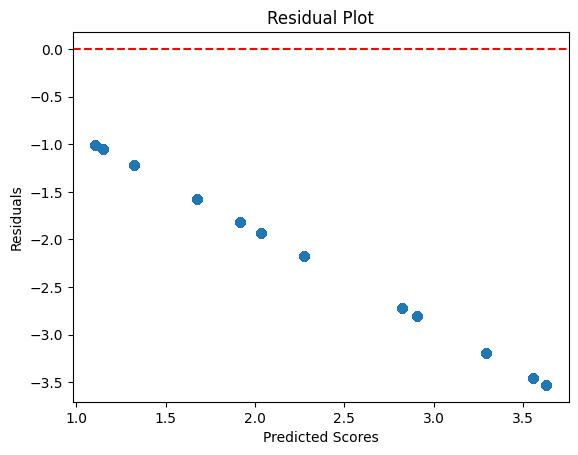

In [23]:
# Residual Plot
residuals = y_test - predicted_scores_reshaped

# Plot the residuals
plt.scatter(predicted_scores_reshaped, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()




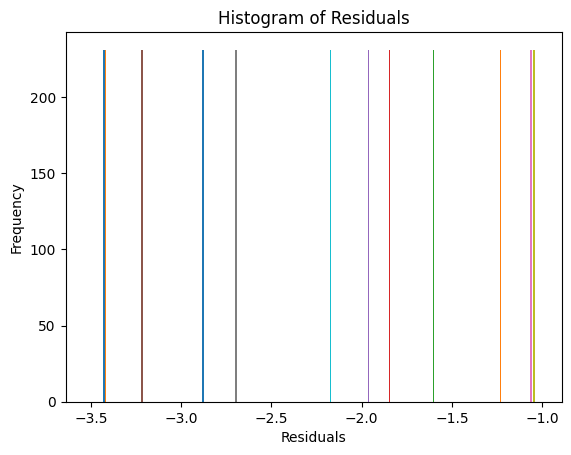

In [24]:
# Calculating residuals
residuals = y_test - predicted_scores_reshaped

# Plotting histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()



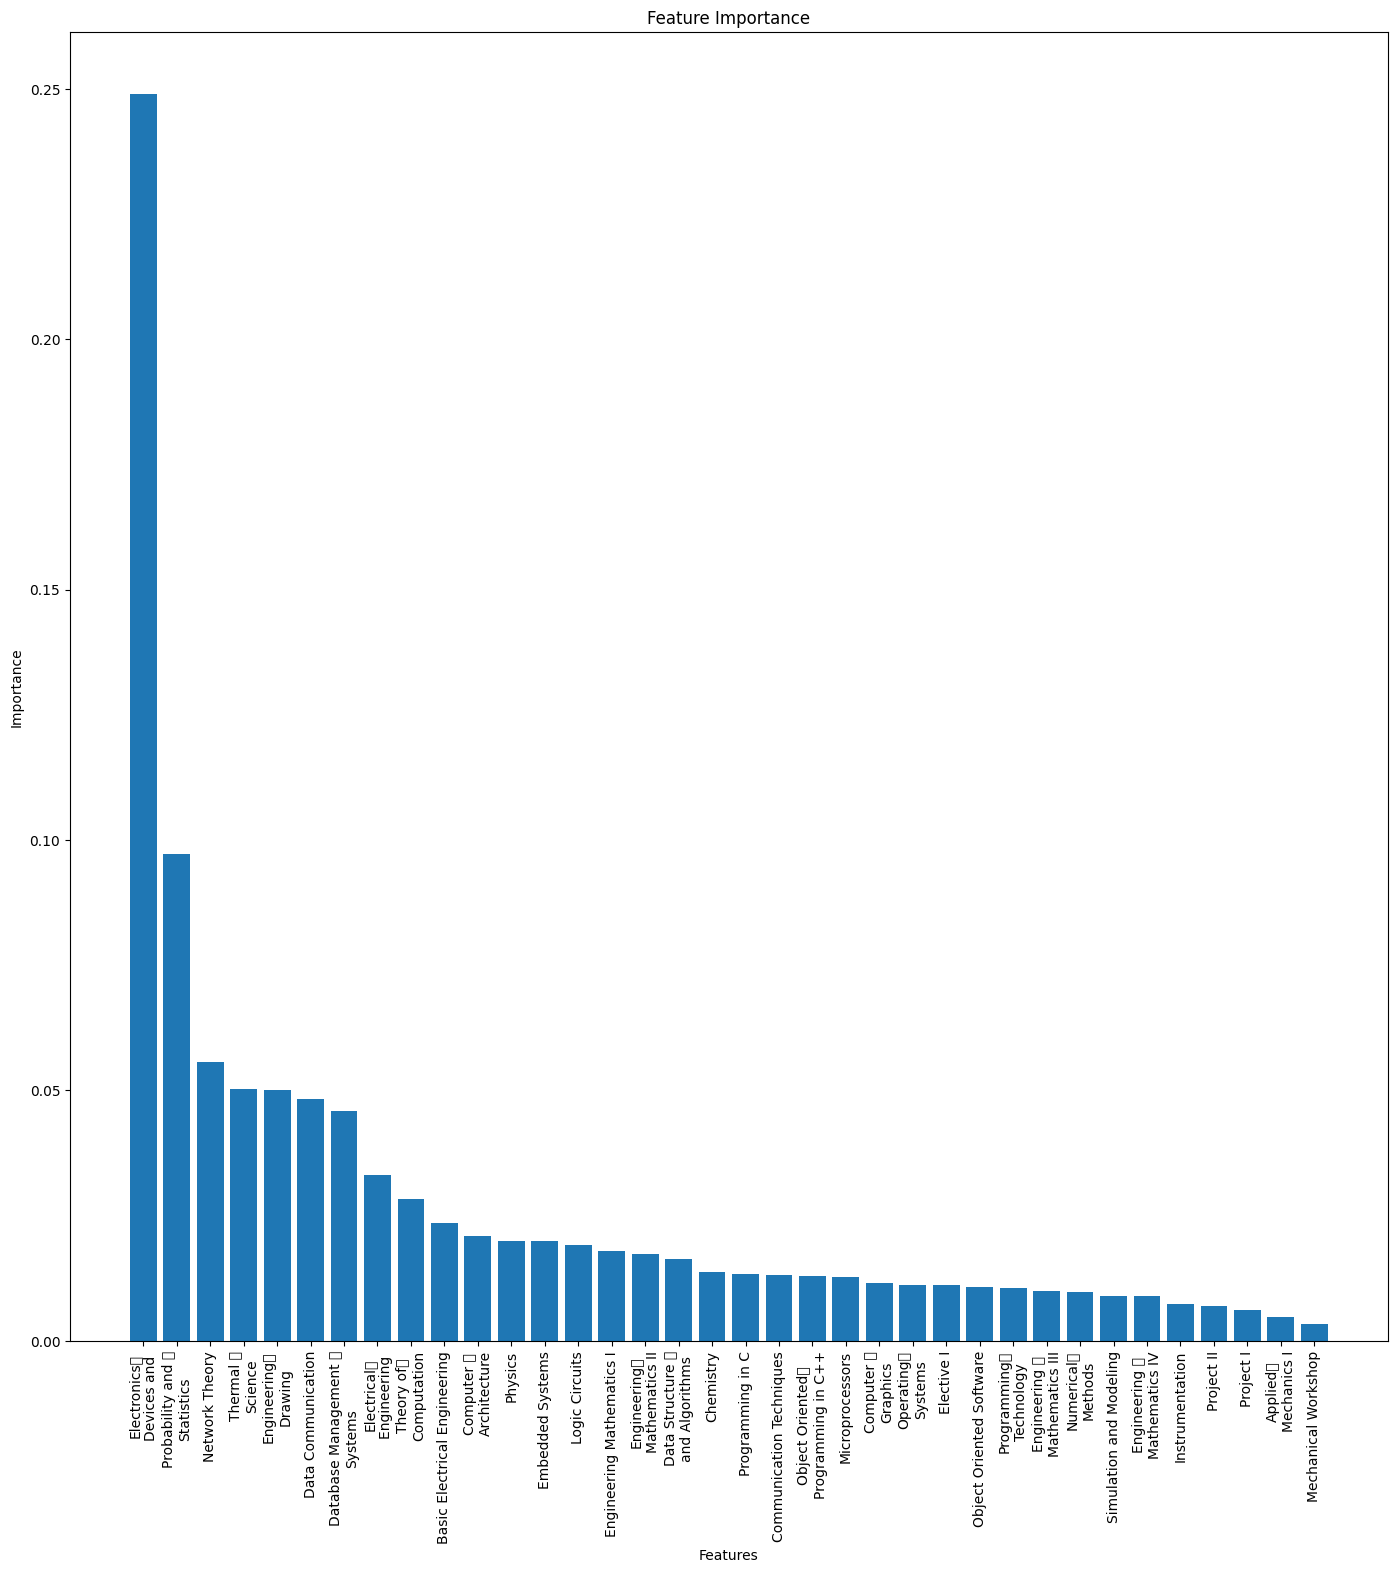

In [25]:
plt.figure(figsize=(17,17))

# Bar Plot of Feature Importance:

importances = model1.feature_importances_  # Assuming model1 is a RandomForestRegressor
feature_names = dataframe.columns[:36]  # Assuming the first 24 columns are the input features

# Sorting feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting bar plot of feature importances
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


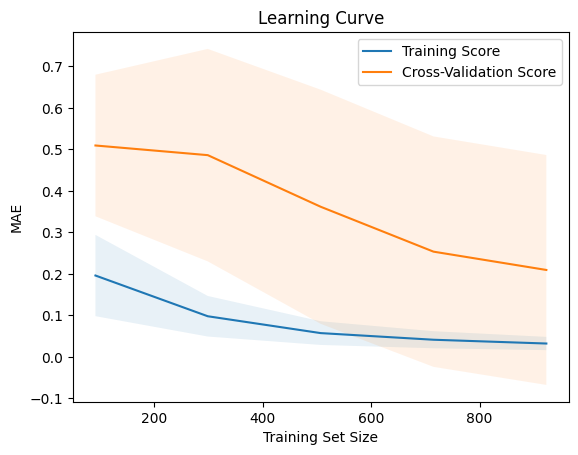

In [26]:
from sklearn.model_selection import learning_curve

# Calculating learning curve
train_sizes, train_scores, test_scores = learning_curve(stacked_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculating mean and standard deviation of train and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting learning curve
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('MAE')
plt.title('Learning Curve')
plt.legend()
plt.show()


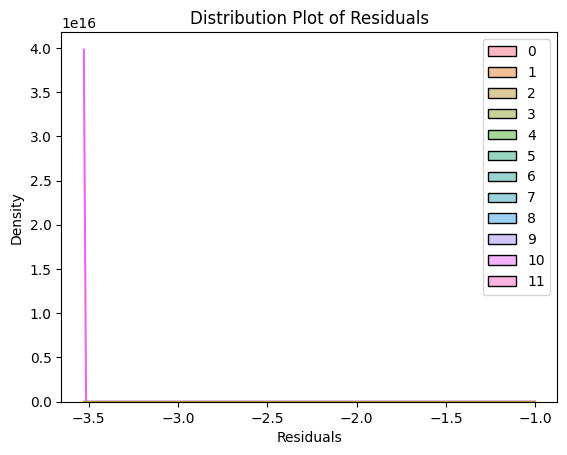

In [27]:
# Plotting distribution plot of residuals #A distribution plot shows the distribution of residuals and can help you assess if they are normally distributed around zero, which is desirable for a good regression model.
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution Plot of Residuals')
plt.show()



